C:\Users\carlo\AppData\Local\Temp\ipykernel_19924\2830085618.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


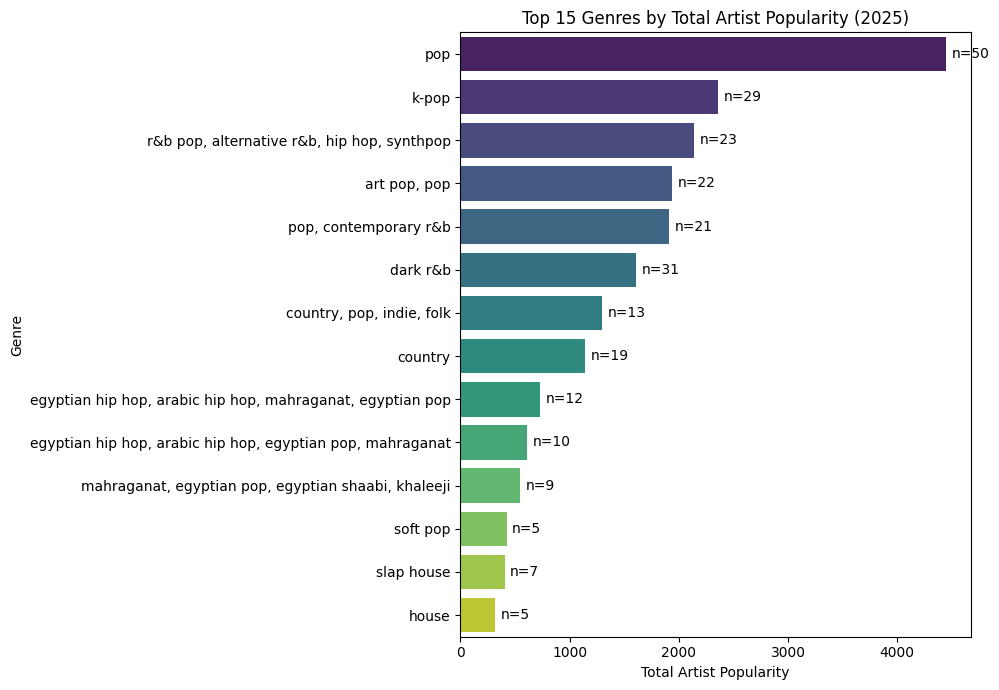

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Filter only 2025 tracks
df_2025 = df[df['year'] == 2025]

# Define column names
genre_col = "artist_genres"
pop_col = "artist_popularity"

# Group by genre and aggregate popularity
agg_2025 = (
    df_2025.groupby(genre_col)[pop_col]
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'total_pop', 'count': 'n'})
)

# Require at least 5 tracks per genre
agg_2025 = agg_2025[agg_2025['n'] >= 5]

# Get top 15 genres by total popularity
top_2025 = agg_2025.sort_values('total_pop', ascending=False).head(15)

# Plot bar graph
plt.figure(figsize=(10, 7))
sns.barplot(
    x='total_pop',
    y=genre_col,
    data=top_2025.reset_index(),
    palette='viridis'
)
plt.xlabel('Total Artist Popularity')
plt.ylabel('Genre')
plt.title('Top 15 Genres by Total Artist Popularity (2025)')

# Annotate counts on bars
for i, (val, cnt) in enumerate(zip(top_2025['total_pop'], top_2025['n'])):
    plt.text(val + 50, i, f'n={cnt}', va='center')

plt.tight_layout()
plt.show()


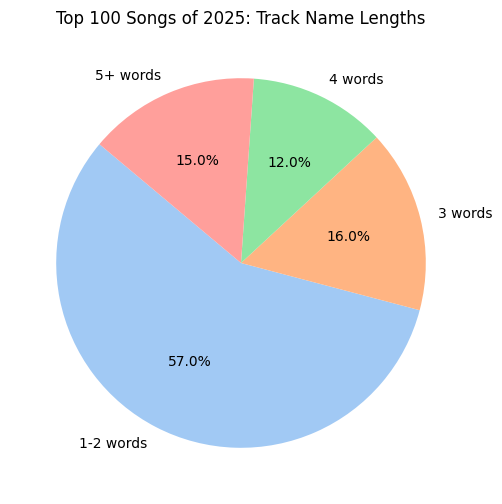

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Filter only songs released in 2025
df_2025 = df[df['year'] == 2025]

# Define column names
pop_col = "track_popularity"
title_col = "track_name"

# Get top 100 songs for 2025 by track popularity
top100_2025 = df_2025.sort_values(by=pop_col, ascending=False).head(100)

# Count words in each track name
name_lengths_2025 = top100_2025[title_col].astype(str).str.split().str.len()

# Categorize name lengths
def categorize(n):
    if n <= 2:
        return '1-2 words'
    elif n == 3:
        return '3 words'
    elif n == 4:
        return '4 words'
    else:
        return '5+ words'

categories_2025 = name_lengths_2025.map(categorize)
counts_2025 = categories_2025.value_counts().reindex(
    ['1-2 words', '3 words', '4 words', '5+ words'], fill_value=0
)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    counts_2025,
    labels=counts_2025.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Top 100 Songs of 2025: Track Name Lengths')
plt.show()


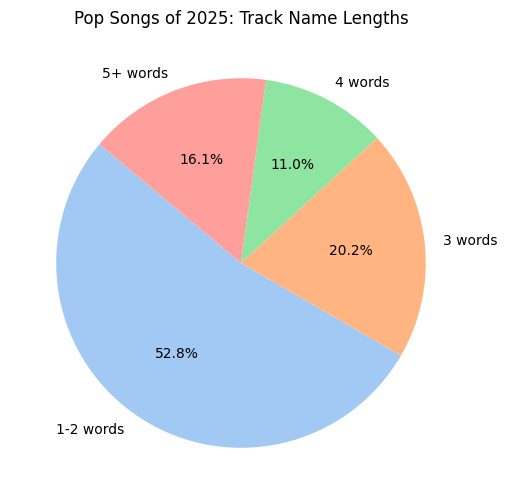

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Filter Pop songs released in 2025
pop_2025 = df[(df['year'] == 2025) & df['artist_genres'].str.contains("Pop", case=False, na=False)]

# Categorize track name lengths
def categorize(n):
    if n <= 2:
        return '1-2 words'
    elif n == 3:
        return '3 words'
    elif n == 4:
        return '4 words'
    else:
        return '5+ words'

if not pop_2025.empty:
    name_lengths = pop_2025['track_name'].astype(str).str.split().str.len()
    categories = name_lengths.map(categorize)
    counts = categories.value_counts().reindex(['1-2 words','3 words','4 words','5+ words'], fill_value=0)

    plt.figure(figsize=(6,6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Pop Songs of 2025: Track Name Lengths')
    plt.show()
else:
    print("No Pop songs found for 2025.")


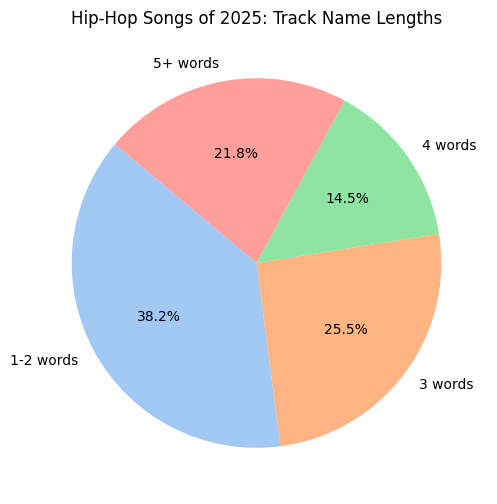

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Filter Hip-Hop songs released in 2025 (string may be "Hip" only)
hiphop_2025 = df[(df['year'] == 2025) & df['artist_genres'].str.contains("Hip", case=False, na=False)]

# Categorize track name lengths
def categorize(n):
    if n <= 2:
        return '1-2 words'
    elif n == 3:
        return '3 words'
    elif n == 4:
        return '4 words'
    else:
        return '5+ words'

if not hiphop_2025.empty:
    name_lengths = hiphop_2025['track_name'].astype(str).str.split().str.len()
    categories = name_lengths.map(categorize)
    counts = categories.value_counts().reindex(['1-2 words','3 words','4 words','5+ words'], fill_value=0)

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel')
    )
    plt.title('Hip-Hop Songs of 2025: Track Name Lengths')
    plt.show()
else:
    print("No Hip-Hop songs found for 2025.")


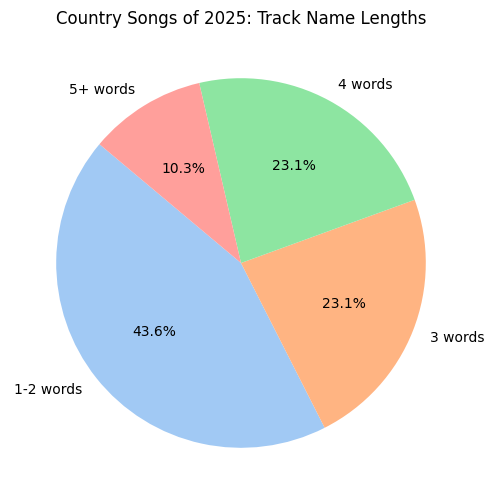

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Filter Country songs released in 2025
country_2025 = df[(df['year'] == 2025) & df['artist_genres'].str.contains("Country", case=False, na=False)]

# Categorize track name lengths
def categorize(n):
    if n <= 2:
        return '1-2 words'
    elif n == 3:
        return '3 words'
    elif n == 4:
        return '4 words'
    else:
        return '5+ words'

if not country_2025.empty:
    name_lengths = country_2025['track_name'].astype(str).str.split().str.len()
    categories = name_lengths.map(categorize)
    counts = categories.value_counts().reindex(['1-2 words','3 words','4 words','5+ words'], fill_value=0)

    plt.figure(figsize=(6,6))
    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel')
    )
    plt.title('Country Songs of 2025: Track Name Lengths')
    plt.show()
else:
    print("No Country songs found for 2025.")


C:\Users\carlo\AppData\Local\Temp\ipykernel_19924\1112421596.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='deep')


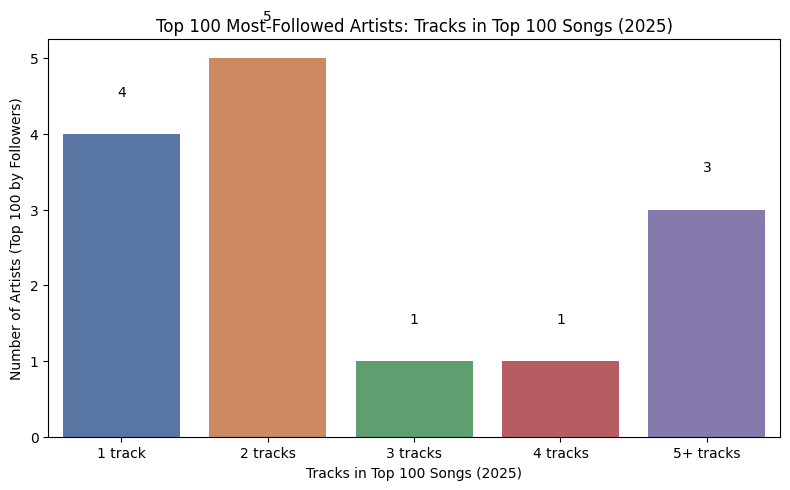

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Define columns
artist_col = "artist_name"
followers_col = "artist_followers"
pop_col = "track_popularity"

# --- Step 1: Top 100 artists by followers ---
top100_followers = (
    df.groupby(artist_col)[followers_col]
    .max()
    .reset_index()
    .sort_values(followers_col, ascending=False)
    .head(100)
)

# --- Step 2: Top 100 songs of 2025 ---
top100_songs_2025 = df[df['year'] == 2025].sort_values(by=pop_col, ascending=False).head(100)

# --- Step 3: Which top-followed artists appear in Top 100 songs 2025 ---
top100_artists_in_songs = top100_followers[
    top100_followers[artist_col].isin(top100_songs_2025[artist_col].unique())
]

# --- Step 4: Count how many tracks those artists had in Top 100 songs 2025 ---
track_counts_top100songs = (
    top100_songs_2025.groupby(artist_col)['track_id']
    .count()
    .reset_index(name='track_count')
)

# Merge with selected artists
top100_with_tracks_top100songs = pd.merge(top100_artists_in_songs, track_counts_top100songs, on=artist_col)

# --- Step 5: Categorize track counts ---
def cat_exact(n):
    if n == 1:
        return '1 track'
    elif n == 2:
        return '2 tracks'
    elif n == 3:
        return '3 tracks'
    elif n == 4:
        return '4 tracks'
    else:
        return '5+ tracks'

top100_with_tracks_top100songs['category_exact'] = top100_with_tracks_top100songs['track_count'].map(cat_exact)

# Count artists per category
counts = top100_with_tracks_top100songs['category_exact'].value_counts().reindex(
    ['1 track', '2 tracks', '3 tracks', '4 tracks', '5+ tracks'], fill_value=0
)

# --- Step 6: Plot bar chart ---
plt.figure(figsize=(8, 5))
sns.barplot(x=counts.index, y=counts.values, palette='deep')
plt.xlabel('Tracks in Top 100 Songs (2025)')
plt.ylabel('Number of Artists (Top 100 by Followers)')
plt.title('Top 100 Most-Followed Artists: Tracks in Top 100 Songs (2025)')

# Annotate values
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()


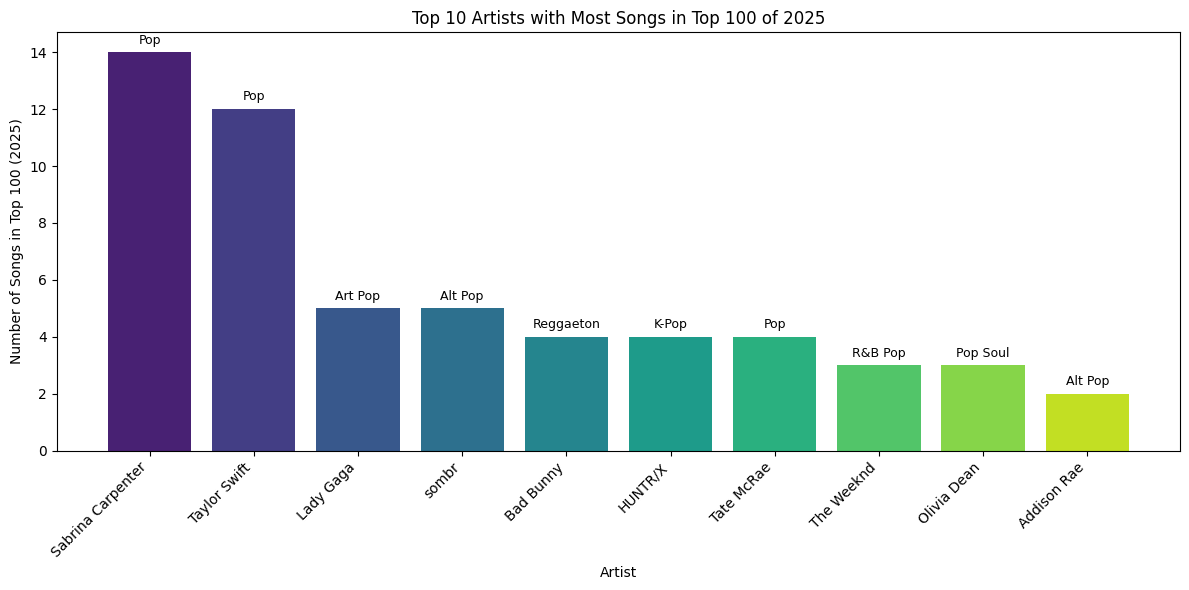


Top 10 Artists in Top 100 Songs of 2025:
1. Sabrina Carpenter - 14 songs (Genre: Pop)
2. Taylor Swift - 12 songs (Genre: Pop)
3. Lady Gaga - 5 songs (Genre: Art Pop)
4. sombr - 5 songs (Genre: Alt Pop)
5. Bad Bunny - 4 songs (Genre: Reggaeton)
6. HUNTR/X - 4 songs (Genre: K-Pop)
7. Tate McRae - 4 songs (Genre: Pop)
8. The Weeknd - 3 songs (Genre: R&B Pop)
9. Olivia Dean - 3 songs (Genre: Pop Soul)
10. Addison Rae - 2 songs (Genre: Alt Pop)


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert album_release_date to datetime and extract year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

# Filter only songs released in 2025
df_2025 = df[df['year'] == 2025]

# Define column names
artist_col = "artist_name"
pop_col = "track_popularity"

# Get top 100 songs for 2025 by track popularity
top100_2025 = df_2025.sort_values(by=pop_col, ascending=False).head(100)

# Get top 10 artists by track count in top 100 of 2025
top10_artists_in_top100 = top100_2025.groupby(artist_col).size().sort_values(ascending=False).head(10)

# Create a list to store artist names and their primary genre
artist_genre_data = []

for artist_name in top10_artists_in_top100.index:
    track_count = top10_artists_in_top100[artist_name]
    # Get the genre for this artist from the first occurrence in top100_2025
    artist_row = top100_2025[top100_2025[artist_col] == artist_name].iloc[0]
    genre_str = artist_row['artist_genres']
    
    # Extract primary genre (first genre in the list)
    if pd.notna(genre_str) and genre_str.strip():
        primary_genre = genre_str.split(',')[0].strip()
    else:
        primary_genre = 'Unknown'
    
    # Override genres for specific artists
    if artist_name == "Taylor Swift":
        primary_genre = "Pop"
    elif artist_name == "Addison Rae":
        primary_genre = "Alt Pop"
    elif artist_name.lower() == "sombr":
        primary_genre = "Alt Pop"
    
    # Capitalize every genre string
    primary_genre = primary_genre.title()
    
    artist_genre_data.append({
        'artist': artist_name,
        'tracks': track_count,
        'genre': primary_genre
    })

# Create dataframe for plotting
plot_df = pd.DataFrame(artist_genre_data)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(plot_df)), plot_df['tracks'], color=sns.color_palette('viridis', len(plot_df)))
plt.xticks(range(len(plot_df)), plot_df['artist'], rotation=45, ha='right')
plt.xlabel('Artist')
plt.ylabel('Number of Songs in Top 100 (2025)')
plt.title('Top 10 Artists with Most Songs in Top 100 of 2025')

# Add genre labels on top of bars
for i, (tracks, genre) in enumerate(zip(plot_df['tracks'], plot_df['genre'])):
    plt.text(i, tracks + 0.2, f'{genre}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary
print("\nTop 10 Artists in Top 100 Songs of 2025:")
for i, row in plot_df.iterrows():
    print(f"{i+1}. {row['artist']} - {row['tracks']} songs (Genre: {row['genre']})")


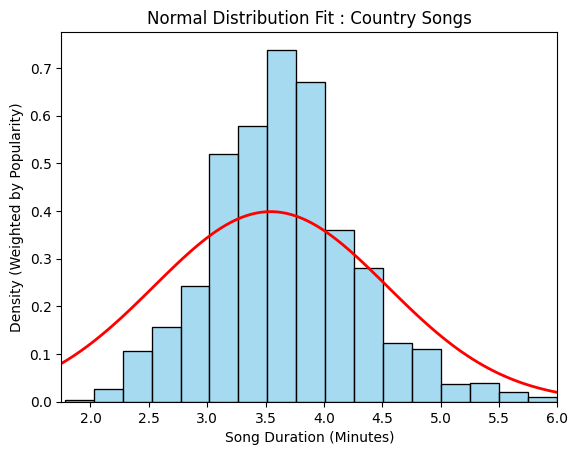

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np


# Load dataset
df = pd.read_csv('spotify_data clean.csv')
country_df = df[df['artist_genres'].fillna('').str.lower().str.contains('country')]


# Histogram with weights (long-form style)
sns.histplot(
    data=country_df,
    x='track_duration_min',
    binwidth=0.25,   # 15 seconds
    weights=df['track_popularity'],
    color='skyblue',
    stat='density'
)




# Fit normal distribution (weighted)
mu, std = norm.fit(df['track_duration_min'].repeat(df['track_popularity']))


# Overlay normal curve
xmin, xmax = plt.xlim((1.75,6))
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)


plt.xlabel('Song Duration (Minutes)')
plt.ylabel('Density (Weighted by Popularity)')
plt.title(f'Normal Distribution Fit : Country Songs')
plt.show()


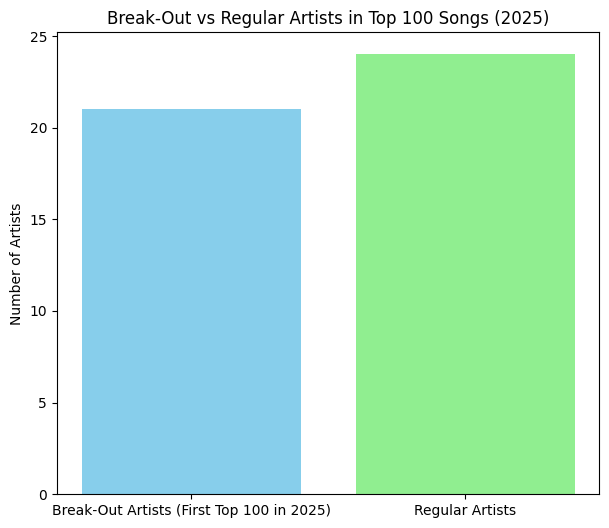

Break-Out Artists: {'DJ Japa NK', 'JENNIE', 'Max McNown', 'BLACKPINK', 'Olivia Dean', 'Rumi', 'TWICE', 'Reneé Rapp', 'HUNTR/X', 'WizTheMc', 'Disco Lines', 'EsDeeKid', 'Saja Boys', 'W Sound', 'JISOO', 'Gigi Perez', 'MOLIY', 'Fuerza Regida', 'Sydney Rose', 'Morgan Wallen', 'Jin'}
Regular Artists: {'RAYE', 'Tyler, The Creator', 'KATSEYE', 'Benson Boone', 'Tame Impala', 'Don Toliver', 'Justin Bieber', 'Doja Cat', 'Drake', 'Chappell Roan', 'Kehlani', 'Ed Sheeran', 'Joji', 'Addison Rae', 'Sabrina Carpenter', 'Taylor Swift', 'The Weeknd', 'Alex Warren', 'PinkPantheress', 'Tate McRae', 'sombr', 'Lady Gaga', 'David Guetta', 'Bad Bunny'}


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("spotify_data clean.csv")

# Convert release date to year
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['year'] = df['album_release_date'].dt.year

artist_col = "artist_name"
pop_col = "track_popularity"

# Get Top 100 songs for 2025
top100_2025 = df[df['year'] == 2025].sort_values(by=pop_col, ascending=False).head(100)

# Get Top 100 songs before 2025
top100_pre2025 = df[df['year'] < 2025].sort_values(by=pop_col, ascending=False).groupby('year').head(100)

breakout_artists = set()
regular_artists = set()

for artist in top100_2025[artist_col].unique():
    past_top100 = top100_pre2025[top100_pre2025[artist_col] == artist]
    
    if past_top100.empty:
        # First time artist appears in Top 100 → breakout in 2025
        breakout_artists.add(artist)
    else:
        # Artist already had Top 100 songs before → regular
        regular_artists.add(artist)

# Count breakout vs regular
counts = {
    "Break-Out Artists (First Top 100 in 2025)": len(breakout_artists),
    "Regular Artists": len(regular_artists)
}

# Plot bar chart
plt.figure(figsize=(7, 6))
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'lightgreen'])
plt.ylabel("Number of Artists")
plt.title("Break-Out vs Regular Artists in Top 100 Songs (2025)")
plt.show()

# Print results
print("Break-Out Artists:", breakout_artists)
print("Regular Artists:", regular_artists)


In [38]:
# Total number of artists in Top 100 (2025)
total_artists = len(top100_2025[artist_col].unique())

# Number of break-out artists
num_breakouts = len(breakout_artists)

# Percentage of break-out artists
percent_breakouts = (num_breakouts / total_artists) * 100

print(f"Break-Out Artists: {num_breakouts}")
print(f"Total Artists in Top 100 (2025): {total_artists}")
print(f"Percentage of Break-Out Artists: {percent_breakouts:.2f}%")


Break-Out Artists: 21
Total Artists in Top 100 (2025): 45
Percentage of Break-Out Artists: 46.67%
